In [1]:
# pip install pvlib
import pvlib

In [2]:
INPUT_PVGIS_DATA = "../data/pvgis_pv.csv"

In [3]:
# 1. Choosing Location #############################
location = pvlib.location.Location(
    latitude=33.448, longitude=112.074, tz="America/Phoenix"
)

location

Location: 
  name: None
  latitude: 33.448
  longitude: 112.074
  altitude: 698.0
  tz: America/Phoenix

In [4]:
# 2. Choosing Panel and Inverter ###################
module_db = pvlib.pvsystem.retrieve_sam("SandiaMod")
module_db

,Advent_Solar_AS160___2006_,Advent_Solar_Ventura_210___2008_,Advent_Solar_Ventura_215___2009_,Aleo_S03_160__2007__E__,Aleo_S03_165__2007__E__,Aleo_S16_165__2007__E__,Aleo_S16_170__2007__E__,Aleo_S16_175__2007__E__,Aleo_S16_180__2007__E__,Aleo_S16_185__2007__E__,...,Panasonic_VBHN235SA06B__2013_,Trina_TSM_240PA05__2013_,Hanwha_HSL60P6_PA_4_250T__2013_,Suniva_OPT300_72_4_100__2013_,Canadian_Solar_CS6X_300M__2013_,LG_LG290N1C_G3__2013_,Sharp_NDQ235F4__2013_,Solar_Frontier_SF_160S__2013_,SolarWorld_Sunmodule_250_Poly__2013_,Silevo_Triex_U300_Black__2014_
Vintage,2006,2008,2009,2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2014
Area,1.312,1.646,1.646,1.28,1.28,1.378,1.378,1.378,1.378,1.378,...,1.26,1.63,1.65,1.93,1.91,1.64,1.56,1.22,1.68,1.68
Material,mc-Si,mc-Si,mc-Si,c-Si,c-Si,mc-Si,mc-Si,mc-Si,mc-Si,mc-Si,...,a-Si / mono-Si,mc-Si,mc-Si,c-Si,c-Si,c-Si,mc-Si,CIS,mc-Si,c-Si
Cells_in_Series,72,60,60,72,72,50,50,50,50,50,...,72,60,60,72,72,60,60,172,60,96
Parallel_Strings,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Isco,5.564,8.34,8.49,5.1,5.2,7.9,7.95,8.1,8.15,8.2,...,5.8738,8.8449,8.5935,8.5753,8.6388,9.8525,8.6739,2.0259,8.3768,5.771
Voco,42.832,35.31,35.92,43.5,43.6,30.0,30.1,30.2,30.3,30.5,...,52.0042,36.8926,36.8075,44.2921,43.5918,39.6117,36.8276,112.5048,36.3806,68.5983
Impo,5.028,7.49,7.74,4.55,4.65,7.08,7.23,7.38,7.53,7.67,...,5.5383,8.2955,8.0822,7.963,8.1359,9.2473,8.1243,1.8356,7.6921,5.383
Vmpo,32.41,27.61,27.92,35.6,35.8,23.3,23.5,23.7,23.9,24.1,...,43.1204,29.066,29.2011,35.0837,34.9531,31.2921,29.1988,86.6752,28.348,55.4547
Aisc,0.000537,0.00077,0.00082,0.0003,0.0003,0.0008,0.0008,0.0008,0.0008,0.0008,...,0.0005,0.0004,0.0004,0.0006,0.0005,0.0002,0.0006,0.0001,0.0006,0.0003


In [5]:
m_db_t = module_db.transpose()
m_db_t

,Vintage,Area,Material,Cells_in_Series,Parallel_Strings,Isco,Voco,Impo,Vmpo,Aisc,...,FD,A,B,C4,C5,IXO,IXXO,C6,C7,Notes
Advent_Solar_AS160___2006_,2006,1.312,mc-Si,72,1,5.564,42.832,5.028,32.41,0.000537,...,1,-3.35,-0.1161,0.9974,0.0026,5.54,3.56,1.173,-0.173,Source: Sandia National Laboratories Updated 9...
Advent_Solar_Ventura_210___2008_,2008,1.646,mc-Si,60,1,8.34,35.31,7.49,27.61,0.00077,...,1,-3.45,-0.077,0.972,0.028,8.25,5.2,1.067,-0.067,Source: Sandia National Laboratories Updated 9...
Advent_Solar_Ventura_215___2009_,2009,1.646,mc-Si,60,1,8.49,35.92,7.74,27.92,0.00082,...,1,-3.47,-0.087,0.989,0.012,8.49,5.45,1.137,-0.137,Source: Sandia National Laboratories Updated 9...
Aleo_S03_160__2007__E__,2007 (E),1.28,c-Si,72,1,5.1,43.5,4.55,35.6,0.0003,...,1,-3.56,-0.075,0.995,0.005,5.04,3.16,1.15,-0.15,Source: Sandia National Laboratories Updated 9...
Aleo_S03_165__2007__E__,2007 (E),1.28,c-Si,72,1,5.2,43.6,4.65,35.8,0.0003,...,1,-3.56,-0.075,0.995,0.005,5.14,3.25,1.15,-0.15,Source: Sandia National Laboratories Updated 9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LG_LG290N1C_G3__2013_,2013,1.64,c-Si,60,1,9.8525,39.6117,9.2473,31.2921,0.0002,...,1,-3.4247,-0.0951,NaN,NaN,NaN,NaN,NaN,NaN,Source: CFV Solar Test Lab. Tested 2013. Mo...
Sharp_NDQ235F4__2013_,2013,1.56,mc-Si,60,1,8.6739,36.8276,8.1243,29.1988,0.0006,...,1,-3.7445,-0.149,NaN,NaN,NaN,NaN,NaN,NaN,Source: CFV Solar Test Lab. Tested 2013. Mo...
Solar_Frontier_SF_160S__2013_,2013,1.22,CIS,172,1,2.0259,112.5048,1.8356,86.6752,0.0001,...,1,-3.6836,-0.1483,NaN,NaN,NaN,NaN,NaN,NaN,Source: CFV Solar Test Lab. Tested 2013. Mo...
SolarWorld_Sunmodule_250_Poly__2013_,2013,1.68,mc-Si,60,1,8.3768,36.3806,7.6921,28.348,0.0006,...,1,-3.73,-0.1483,NaN,NaN,NaN,NaN,NaN,NaN,Source: CFV Solar Test Lab. Tested 2013. Mo...


In [6]:
m_db_t.to_csv("module_db.csv")

In [7]:
m_db_t["power"] = m_db_t["Impo"] * m_db_t["Vmpo"]
m_db_t

,Vintage,Area,Material,Cells_in_Series,Parallel_Strings,Isco,Voco,Impo,Vmpo,Aisc,...,A,B,C4,C5,IXO,IXXO,C6,C7,Notes,power
Advent_Solar_AS160___2006_,2006,1.312,mc-Si,72,1,5.564,42.832,5.028,32.41,0.000537,...,-3.35,-0.1161,0.9974,0.0026,5.54,3.56,1.173,-0.173,Source: Sandia National Laboratories Updated 9...,162.95748
Advent_Solar_Ventura_210___2008_,2008,1.646,mc-Si,60,1,8.34,35.31,7.49,27.61,0.00077,...,-3.45,-0.077,0.972,0.028,8.25,5.2,1.067,-0.067,Source: Sandia National Laboratories Updated 9...,206.7989
Advent_Solar_Ventura_215___2009_,2009,1.646,mc-Si,60,1,8.49,35.92,7.74,27.92,0.00082,...,-3.47,-0.087,0.989,0.012,8.49,5.45,1.137,-0.137,Source: Sandia National Laboratories Updated 9...,216.1008
Aleo_S03_160__2007__E__,2007 (E),1.28,c-Si,72,1,5.1,43.5,4.55,35.6,0.0003,...,-3.56,-0.075,0.995,0.005,5.04,3.16,1.15,-0.15,Source: Sandia National Laboratories Updated 9...,161.98
Aleo_S03_165__2007__E__,2007 (E),1.28,c-Si,72,1,5.2,43.6,4.65,35.8,0.0003,...,-3.56,-0.075,0.995,0.005,5.14,3.25,1.15,-0.15,Source: Sandia National Laboratories Updated 9...,166.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LG_LG290N1C_G3__2013_,2013,1.64,c-Si,60,1,9.8525,39.6117,9.2473,31.2921,0.0002,...,-3.4247,-0.0951,NaN,NaN,NaN,NaN,NaN,NaN,Source: CFV Solar Test Lab. Tested 2013. Mo...,289.367436
Sharp_NDQ235F4__2013_,2013,1.56,mc-Si,60,1,8.6739,36.8276,8.1243,29.1988,0.0006,...,-3.7445,-0.149,NaN,NaN,NaN,NaN,NaN,NaN,Source: CFV Solar Test Lab. Tested 2013. Mo...,237.219811
Solar_Frontier_SF_160S__2013_,2013,1.22,CIS,172,1,2.0259,112.5048,1.8356,86.6752,0.0001,...,-3.6836,-0.1483,NaN,NaN,NaN,NaN,NaN,NaN,Source: CFV Solar Test Lab. Tested 2013. Mo...,159.100997
SolarWorld_Sunmodule_250_Poly__2013_,2013,1.68,mc-Si,60,1,8.3768,36.3806,7.6921,28.348,0.0006,...,-3.73,-0.1483,NaN,NaN,NaN,NaN,NaN,NaN,Source: CFV Solar Test Lab. Tested 2013. Mo...,218.055651


In [8]:
filter = (m_db_t["power"] > 200) & (m_db_t["power"] < 220)
m_db_t[filter]

,Vintage,Area,Material,Cells_in_Series,Parallel_Strings,Isco,Voco,Impo,Vmpo,Aisc,...,A,B,C4,C5,IXO,IXXO,C6,C7,Notes,power
Advent_Solar_Ventura_210___2008_,2008,1.646,mc-Si,60,1,8.34,35.31,7.49,27.61,0.00077,...,-3.45,-0.077,0.972,0.028,8.25,5.2,1.067,-0.067,Source: Sandia National Laboratories Updated 9...,206.7989
Advent_Solar_Ventura_215___2009_,2009,1.646,mc-Si,60,1,8.49,35.92,7.74,27.92,0.00082,...,-3.47,-0.087,0.989,0.012,8.49,5.45,1.137,-0.137,Source: Sandia National Laboratories Updated 9...,216.1008
BP_Solar_BP3220N_Module___2010_,2010,1.657,c-Si,60,1,8.12406,36.7564,7.5726,28.5968,0.000535,...,-3.38384,-0.109254,0.987368,0.012632,8.12989,5.16359,1.16476,-0.164758,Source: Sandia National Laboratories Updated 9...,216.552128
Canadian_Solar_CS5P_220M___2009_,2009,1.701,c-Si,96,1,5.09115,59.2608,4.54629,48.3156,0.000397,...,-3.40641,-0.084208,0.996446,0.003554,4.97599,3.18803,1.15535,-0.155353,Source: Sandia National Laboratories Updated 9...,219.656729
Kyocera_Solar_KD205GX_LP__2008__E__,2008 (E),1.485,mc-Si,54,1,8.36,33.2,7.71,26.6,0.0006,...,-3.56,-0.075,0.9866,0.0134,8.25,5.41,1.1183,-0.1183,Source: Sandia National Laboratories Updated 9...,205.086
Ligitek_LM220_BB00___2009_,2009,1.611,mc-Si,60,1,8.19631,36.8783,7.5314,28.8307,0.000375,...,-3.44147,-0.099067,0.990786,0.009214,8.07998,5.19033,1.17446,-0.174464,Source: Sandia National Laboratories Updated 9...,217.135534
Moser_Baer_MBPV_220_Module___2010_,2010,1.648,mc-Si,60,1,7.722,36.407,7.211,28.893,0.000663,...,-3.372,-0.09907,0.9892,0.0108,7.7032,5.0221,1.1405,-0.1405,Source: Sandia National Laboratories Updated 9...,208.347423
Moser_Baer_MBPV_220_Module__2010__E__,2010 (E),1.648,mc-Si,60,1,8.0,36.46,7.47,29.42,0.000663,...,-3.372,-0.09907,0.9892,0.0108,7.7032,5.15,1.1405,-0.1405,Source: Sandia National Laboratories Updated 9...,219.7674
PowerLight_PL_210_QM_I__2008__E__,2008 (E),1.643,mc-Si,60,1,8.0,35.95,7.35,28.75,0.0003,...,-3.54,-0.072,0.985,0.015,7.9,5.4,1.113,-0.113,Source: Sandia National Laboratories Updated 9...,211.3125
Sanyo_H168___2005_,2005,1.19,HIT-Si,96,1,4.104,67.1,3.819,53.98,0.000458,...,-3.266,-0.1067,0.9954,0.0046,4.07,2.73,1.1203,-0.1203,Source: Sandia National Laboratories Updated 9...,206.14962


In [9]:
m_db_t.to_csv("filtered_modules.csv")

In [10]:
module = module_db["Kyocera_Solar_KD205GX_LP__2008__E__"]
module

Vintage                                                      2008 (E)
Area                                                            1.485
Material                                                        mc-Si
Cells_in_Series                                                    54
Parallel_Strings                                                    1
Isco                                                             8.36
Voco                                                             33.2
Impo                                                             7.71
Vmpo                                                             26.6
Aisc                                                           0.0006
Aimp                                                         -0.00014
C0                                                              1.006
C1                                                             -0.006
Bvoco                                                           -0.12
Mbvoc               

In [11]:
inverter = pvlib.pvsystem.retrieve_sam("CECInverter")["ABB__PVI_3_0_OUTD_S_US__208V_"]
inverter

Vac                          208
Pso                    18.166279
Paco                      3000.0
Pdco                  3142.30127
Vdco                       310.0
C0                     -0.000008
C1                     -0.000011
C2                      0.000999
C3                     -0.000287
Pnt                          0.1
Vdcmax                     480.0
Idcmax                 10.136456
Mppt_low                   100.0
Mppt_high                  480.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: ABB__PVI_3_0_OUTD_S_US__208V_, dtype: object

In [12]:
# 3. Creating PVSystem ###################
temperature_model = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS["sapm"][
    "open_rack_glass_polymer"
]

system = pvlib.pvsystem.PVSystem(
    surface_tilt=33,
    surface_azimuth=-16,
    module_parameters=module,
    inverter_parameters=inverter,
    modules_per_string=7,
    strings_per_inverter=2,
    temperature_model_parameters=temperature_model,
)

In [13]:
# 4. Loading Weather Data ################
df_hourly, _, _ = pvlib.iotools.read_pvgis_hourly(INPUT_PVGIS_DATA)
df_hourly

,poa_direct,poa_sky_diffuse,poa_ground_diffuse,solar_elevation,temp_air,wind_speed,Int
time,,,,,,,
2018-01-01 00:30:00+00:00,156.56,77.69,1.52,8.84,2.17,0.76,0
2018-01-01 01:30:00+00:00,334.30,140.46,3.89,18.38,2.81,0.48,0
2018-01-01 02:30:00+00:00,560.36,155.94,6.35,26.16,4.81,0.83,0
2018-01-01 03:30:00+00:00,665.85,166.05,7.94,31.45,6.38,1.38,0
2018-01-01 04:30:00+00:00,664.88,160.94,8.28,33.53,7.48,1.66,0
...,...,...,...,...,...,...,...
2020-12-31 19:30:00+00:00,0.00,0.00,0.00,0.00,-5.56,1.52,0
2020-12-31 20:30:00+00:00,0.00,0.00,0.00,0.00,-5.64,1.52,0
2020-12-31 21:30:00+00:00,0.00,0.00,0.00,0.00,-5.59,1.59,0


In [14]:
df_hourly = df_hourly.assign(
    poa_diffuse=df_hourly["poa_ground_diffuse"] + df_hourly["poa_sky_diffuse"],
    poa_global=df_hourly["poa_ground_diffuse"]
    + df_hourly["poa_sky_diffuse"]
    + df_hourly["poa_direct"],
)
df_hourly

,poa_direct,poa_sky_diffuse,poa_ground_diffuse,solar_elevation,temp_air,wind_speed,Int,poa_diffuse,poa_global
time,,,,,,,,,
2018-01-01 00:30:00+00:00,156.56,77.69,1.52,8.84,2.17,0.76,0,79.21,235.77
2018-01-01 01:30:00+00:00,334.30,140.46,3.89,18.38,2.81,0.48,0,144.35,478.65
2018-01-01 02:30:00+00:00,560.36,155.94,6.35,26.16,4.81,0.83,0,162.29,722.65
2018-01-01 03:30:00+00:00,665.85,166.05,7.94,31.45,6.38,1.38,0,173.99,839.84
2018-01-01 04:30:00+00:00,664.88,160.94,8.28,33.53,7.48,1.66,0,169.22,834.10
...,...,...,...,...,...,...,...,...,...
2020-12-31 19:30:00+00:00,0.00,0.00,0.00,0.00,-5.56,1.52,0,0.00,0.00
2020-12-31 20:30:00+00:00,0.00,0.00,0.00,0.00,-5.64,1.52,0,0.00,0.00
2020-12-31 21:30:00+00:00,0.00,0.00,0.00,0.00,-5.59,1.59,0,0.00,0.00


In [25]:
mc = pvlib.modelchain.ModelChain(system=system, location=location)
mc.run_model_from_poa(df_hourly)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

<Axes: xlabel='time'>

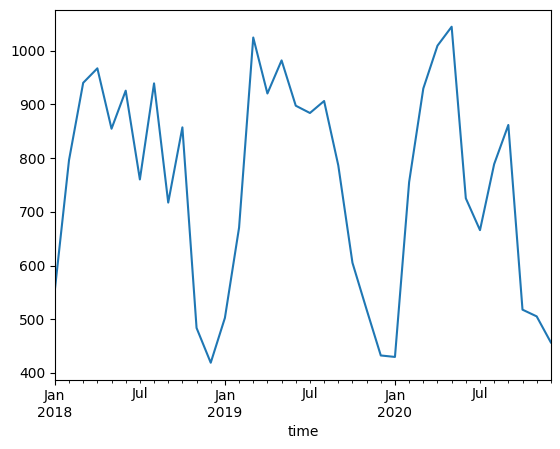

In [26]:
mc.results.ac.resample("ME").mean().plot()

In [27]:
power_df = mc.results.ac.copy()
power_df

time
2018-01-01 00:30:00+00:00    204.834688
2018-01-01 01:30:00+00:00    388.246951
2018-01-01 02:30:00+00:00    413.514484
2018-01-01 03:30:00+00:00    432.212725
2018-01-01 04:30:00+00:00    660.099559
                                ...    
2020-12-31 19:30:00+00:00           NaN
2020-12-31 20:30:00+00:00           NaN
2020-12-31 21:30:00+00:00           NaN
2020-12-31 22:30:00+00:00           NaN
2020-12-31 23:30:00+00:00           NaN
Length: 26304, dtype: float64

In [28]:
power_df = power_df[power_df.index.year == 2018]

In [ ]:
power_df.to_csv("2018.hourly.csv")
power_df.resample("D").sum().to_csv("2018_daily.csv")